<a href="https://colab.research.google.com/github/riCl3/Neural-Network/blob/optimization/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nnfs

In [2]:
import nnfs
from nnfs.datasets import spiral_data
import numpy as np

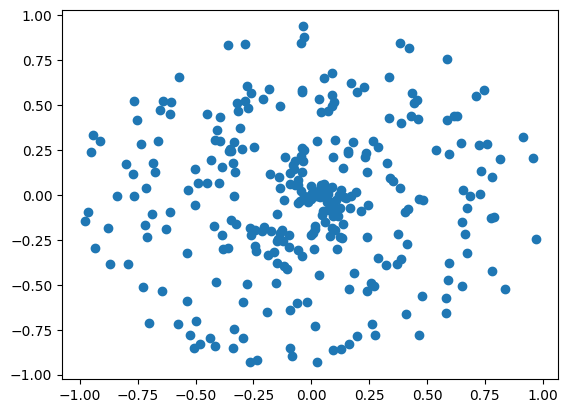

In [3]:
nnfs.init()
import matplotlib.pyplot as plt
X,y = spiral_data(samples=100, classes = 3)
plt.scatter(X[:,0], X[:,1])
plt.show()

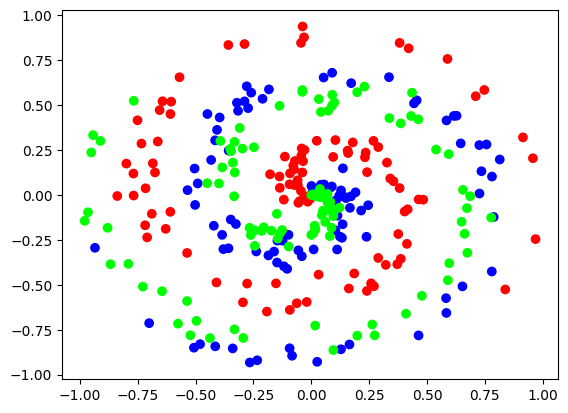

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap ='brg')
plt.show()

In [5]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

# Dense Layer Coding
class Layer_Dense:
    # initialization of layer
    def __init__(self, n_inputs, n_neurons):
        # Initialization of Weights and Bias
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward Pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# Creation of dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense Layer with 2 inputs and 3 output values (neurons)
dense1 = Layer_Dense(2, 3)

# The code above created the neurons and parameters, but it hasn't calculated the output yet
# To calculate output, run the code below:
dense1.forward(X)

# Print the output for a few samples (change to [:5] to print first 5)
print(dense1.output[:5])


[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


In [6]:
#ReLU Activation
class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0,inputs)

In [7]:
X,y = spiral_data(samples = 100, classes = 3)

# Create a neural layer
dense1 = Layer_Dense(2,3)
# Calcualte  output of the neural layer
dense1.forward(X)
# Create a Activation Function and
activation1 = Activation_ReLU()
# Connect the ouput of the Neural Layer to the input of Activation Funtion and
# Calculate the Output from the Activation Funtion
activation1.forward(dense1.output)
# Create another Neural Layer
dense2 = Layer_Dense(3,3)
# Calculate the Output of the Neural Layer
dense2.forward(activation1.output)
# Create a Activation Function and
activation2 = Activation_ReLU()
# Connect the output of Neural Layer to the input of the Activation Function
# Calculate the output from the Activation Function
activation2.forward(dense2.output)
# Create another Neural Layer
dense3 = Layer_Dense(3,3)
# Calculate the output of the neural layer
dense3.forward(activation2.output)
# Create another Activation Function
activation3 = Activation_ReLU()
# Connect the output of Neural Layer to the input of Activation Layer
activation3.forward(dense3.output)
print(activation3.output[:5])


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### **ReLU Activation**

In [8]:
# ReLU activation
class Activation_ReLU:
 # Forward pass
 def forward(self, inputs):
 # Calculate output values from input
  self.output = np.maximum(0, inputs)

In [9]:
X,y = spiral_data(samples = 1000, classes = 3)

dense1 = Layer_Dense(2,6)

dense1.forward(X)

activation1 = Activation_ReLU()

activation1.forward(dense1.output)

print(activation1.output[:5])


[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.2884151e-05 1.4987405e-05 1.4888491e-07 1.7376786e-05 1.0942550e-07
  0.0000000e+00]
 [1.4892953e-05 2.3416345e-05 0.0000000e+00 2.7021691e-05 1.8334723e-06
  0.0000000e+00]
 [4.3635864e-05 4.7495567e-05 3.2939085e-06 5.5136068e-05 0.0000000e+00
  0.0000000e+00]
 [6.0041544e-05 6.4199063e-05 5.5181476e-06 7.4552474e-05 0.0000000e+00
  0.0000000e+00]]


## **Softmax Activation**

In [10]:
# Softmax Activation
class Activation_Softmax:
  #Forward Pass
  def forward(self,inputs):
    # Get unnormarlized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
    # Normalize them for each samples
    probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
    self.output = probabilities

## **ONE FORWARD PASS (WITHOUT LOSS)**

In [11]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)
# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]


# **Claculation of Network Layer With Loss**

In [12]:
softmax_outputs  = np.array([[0.7, 0.1, 0.2], [0.1, 0.5, 0.4], [0.02, 0.9, 0.08]])
class_targets = [0,1,1] # 0 = Red, 1 = Green, 2 = Blue
print(softmax_outputs[range(len(softmax_outputs)), class_targets])

[0.7 0.5 0.9]


In [13]:
range(len(softmax_outputs))

range(0, 3)

# **Calculation of Loss**

In [14]:
print(-np.log(softmax_outputs[range(len(softmax_outputs)),class_targets]))

neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets]) # -log[(0.35 + 0.69 + 0.10)]

average_loss = np.mean(neg_log)
print(average_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


# **If Data is One Hot Encoded**
Here is the details, how to extract the relevant predictions if data is One Hot Encoded

In [15]:
y_true_ckeck = np.array([
    [1,0,0],
    [0,1,0],
    [0,1,0]
    ])
y_pred_clipped_check = np.array([
    [0.7, 0.2, 0.1],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]
])

A = y_true_ckeck * y_pred_clipped_check #Performing a element-wise multiplication, np.dot(a,b) gives matrix multiplication
B = np.sum(A, axis = 1)
C = -np.log(B)

print(C)
print(np.mean(C))

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


## **Implementing Loss as a Class**

In [16]:
class Loss:
  def calculate(self,output,y):
    #Calculates the data and regularization losses
    # given model output and ground truth (actual) values
    sample_losses = self.forward(output,y)
    # Calculate mean Loss
    data_loss = np.mean(sample_losses)
    # Return Loss
    return data_loss

## **Coding Loss for Both Environments**

In [17]:
class Loss_CategoricalCrossentropy(Loss):
  # Forward Pass
  def forward(self, y_pred, y_true):
    # Calculating the number of rows i.e. samples in a batch
    samples = len(y_pred)
    # Clip data to prevent division by 0 -> Probabilty should not be 0 in any condition
    # Clip both sides not to drag mean towards any value -> Probability should not be 1 in any condition
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

    if len(y_true.shape)==1:
      correct_confidences = y_pred_clipped[
          range(samples),
          y_true
          ]

    elif len(y_true.shape)==2:
      correct_confidences = np.sum(
          y_pred_clipped*y_true,  # Element-wise multiplication for one hot encoding
          axis =1
      )

    # Losses
    np.negative_log_likelihoods = -np.log(correct_confidences)
    return np.negative_log_likelihoods


In [18]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = np.array([[1, 0, 0],
 [0, 1, 0],
 [0, 1, 0]])
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


## **Introducing Accuracy**

In [19]:
import numpy as np
# Probabilities of 3 samples
softmax_outputs = np.array([[0.7, 0.2, 0.1],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])
# Calculate values along second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis=1)
# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2:
 class_targets = np.argmax(class_targets, axis=1)
# True evaluates to 1; False to 0
accuracy = np.mean(predictions == class_targets)
print('acc:', accuracy)

acc: 1.0


# **All the Functions Designed uptill Now**

In [20]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()


# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print(activation2.output[:5])
# Perform a forward pass through activation function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)
# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
 y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
# Print accuracy
print('acc:', accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.33333308 0.33333316 0.3333337 ]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
loss: 1.0986104
acc: 0.3


# **Taking a SImpler Dataset**

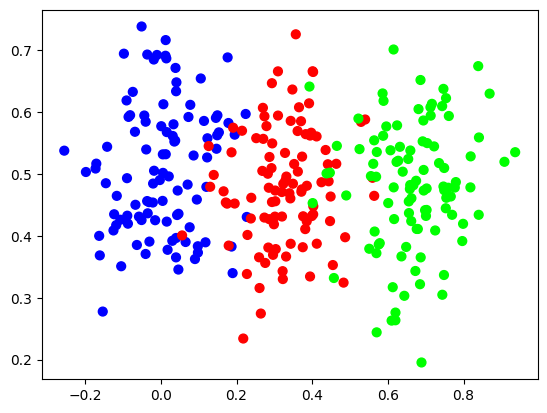

In [21]:
#SIMPLER DATASET
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

# **Randomly Select Weights and Biases (Strategy 1)**

In [22]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
 # Generate a new set of weights for iteration
 dense1.weights = 0.05 * np.random.randn(2, 3)
 dense1.biases = 0.05 * np.random.randn(1, 3)
 dense2.weights = 0.05 * np.random.randn(3, 3)
 dense2.biases = 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of the training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
   print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
   best_dense1_weights = dense1.weights.copy()
   best_dense1_biases = dense1.biases.copy()
   best_dense2_weights = dense2.weights.copy()
   best_dense2_biases = dense2.biases.copy()
   lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.1016203 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.1002508 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0992025 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986239 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0984299 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0976521 acc: 0.36333333333333334
New set of weights found, iteration: 150 loss: 1.0974255 acc: 0.3333333333333333
New set of weights found, iteration: 874 loss: 1.0972673 acc: 0.3333333333333333
New set of weights found, iteration: 894 loss: 1.096895 acc: 0.3333333333333333
New set of weights found, iteration: 1036 loss: 1.0954281 acc: 0.3333333333333333
New set of weights found, iteration: 88633 loss: 1.0952065 acc: 0.3333333333333333


# **Select Weight and Biases (Strategy 2)**

In [23]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
for iteration in range(10000):
 # Update weights with some small random values
 dense1.weights += 0.05 * np.random.randn(2, 3)
 dense1.biases += 0.05 * np.random.randn(1, 3)
 dense2.weights += 0.05 * np.random.randn(3, 3)
 dense2.biases += 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of our training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
  print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()
  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  lowest_loss = loss
 # Revert weights and biases
 else:
  dense1.weights = best_dense1_weights.copy()
  dense1.biases = best_dense1_biases.copy()
  dense2.weights = best_dense2_weights.copy()
  dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.1008747 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.1005715 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.099462 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.099436 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.09855 acc: 0.3333333333333333
New set of weights found, iteration: 13 loss: 1.098517 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0938607 acc: 0.3333333333333333
New set of weights found, iteration: 15 loss: 1.0920315 acc: 0.3333333333333333
New set of weights found, iteration: 17 loss: 1.0913911 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.0910357 acc: 0.3333333333333333
New set of weights found, iteration: 20 loss: 1.0898421 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0843327 acc: 0.3333333333333333
New set of weights found, iteration: 26 loss: 1.0

## **Same Strategy Applied to Spiral Data -> Accuracy DROPS!**

In [24]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
for iteration in range(10000):
 # Update weights with some small random values
 dense1.weights += 0.05 * np.random.randn(2, 3)
 dense1.biases += 0.05 * np.random.randn(1, 3)
 dense2.weights += 0.05 * np.random.randn(3, 3)
 dense2.biases += 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of our training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
  print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()
  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  lowest_loss = loss
 # Revert weights and biases
 else:
  dense1.weights = best_dense1_weights.copy()
  dense1.biases = best_dense1_biases.copy()
  dense2.weights = best_dense2_weights.copy()
  dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.0991904 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0988214 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0982754 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0978642 acc: 0.3333333333333333
New set of weights found, iteration: 23 loss: 1.0972557 acc: 0.35
New set of weights found, iteration: 37 loss: 1.0970367 acc: 0.35
New set of weights found, iteration: 40 loss: 1.0958394 acc: 0.37
New set of weights found, iteration: 41 loss: 1.0950066 acc: 0.4066666666666667
New set of weights found, iteration: 44 loss: 1.0948946 acc: 0.37333333333333335
New set of weights found, iteration: 53 loss: 1.0943341 acc: 0.3933333333333333
New set of weights found, iteration: 58 loss: 1.0942849 acc: 0.36666666666666664
New set of weights found, iteration: 59 loss: 1.0941793 acc: 0.35
New set of weights found, iteration: 60 loss: 1.0926698 acc: 0.38666666666666666
New set of weigh

### **Here you can see when we use Spiral Data from Linear Data, the accuracy Drops 90% to 40%**

# **So Drum Rolls! Introducing Backpropagation**

In [28]:
import numpy as np

# Initial inputs
inputs = np.array([1, 2, 3, 4])

# Initial weights and biases
weights = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.5, 0.6, 0.7, 0.8],
    [0.9, 1.0, 1.1, 1.2]
])

biases = np.array([0.1, 0.2, 0.3])

# Learning rate
learning_rate = 0.001

# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Training loop
for iteration in range(200):
    # Forward pass
    z = np.dot(weights, inputs) + biases
    a = relu(z)
    y = np.sum(a)

    # Calculate loss
    loss = y ** 2

    # Backward pass
    # Gradient of loss with respect to output y
    dL_dy = 2 * y

    # Gradient of y with respect to a
    dy_da = np.ones_like(a)

    # Gradient of loss with respect to a
    dL_da = dL_dy * dy_da

    # Gradient of a with respect to z (ReLU derivative)
    da_dz = relu_derivative(z)

    # Gradient of loss with respect to z
    dL_dz = dL_da * da_dz

    # Gradient of z with respect to weights and biases
    dL_dW = np.outer(dL_dz, inputs)
    dL_db = dL_dz

    # Update weights and biases
    weights -= learning_rate * dL_dW
    biases -= learning_rate * dL_db

    # Print the loss every 20 iterations
    if iteration % 20 == 0:
        print(f"Iteration {iteration}, Loss: {loss}")

# Final weights and biases
print("Final weights:\n", weights)
print("Final biases:\n", biases)



Iteration 0, Loss: 466.56000000000006
Iteration 20, Loss: 5.329595763793193
Iteration 40, Loss: 0.41191524253483786
Iteration 60, Loss: 0.03183621475376345
Iteration 80, Loss: 0.002460565405431671
Iteration 100, Loss: 0.0001901729121621426
Iteration 120, Loss: 1.4698120139337557e-05
Iteration 140, Loss: 1.1359948840900371e-06
Iteration 160, Loss: 8.779778427447647e-08
Iteration 180, Loss: 6.785903626216421e-09
Final weights:
 [[-0.00698895 -0.0139779  -0.02096685 -0.0279558 ]
 [ 0.25975286  0.11950571 -0.02074143 -0.16098857]
 [ 0.53548461  0.27096922  0.00645383 -0.25806156]]
Final biases:
 [-0.00698895 -0.04024714 -0.06451539]
